<a href="https://colab.research.google.com/github/ToukirSabugar/ANOMALY-DETECTION/blob/main/fb_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alibi-detect[prophet]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.4/372.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 95.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 140.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 95.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [ ]:
pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px
import numpy as np
mpl.rcParams['figure.figsize'] = (14,8)
mpl.rcParams['axes.grid'] = False

In [ ]:

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py

In [ ]:
df = pd.read_csv('/content/nyc_taxi (2).csv')
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df.timestamp = pd.to_datetime(df['timestamp'])


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df = df.set_index('timestamp').resample("H").mean()
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [ ]:
fig = px.line(df.reset_index(), x = 'timestamp',y = 'value',title = 'NYC_Taxi_Demand')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='month',stepmode = "backward"),
                        dict(count = 2,label = '3y',step='month',stepmode = "backward"),
                        dict(count = 3,label = '5y',step='month',stepmode = "todate"),
                        dict(step= 'all')
                            ])
                        )
                   )
fig.show()

In [ ]:
taxi_df = df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')


In [ ]:
taxi_df


,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
train = taxi_df[(taxi_df['ds']>='2014-07-01') & (taxi_df['ds']<='2015-01-27')]
test = taxi_df[(taxi_df['ds']>'2015-01-27')]

In [ ]:
print(train.shape)
print(test.shape)

(5041, 2)
(119, 2)


In [ ]:
test


,ds,y
5041,2015-01-27 01:00:00,39.5
5042,2015-01-27 02:00:00,29.0
5043,2015-01-27 03:00:00,9.5
5044,2015-01-27 04:00:00,14.5
5045,2015-01-27 05:00:00,29.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
m = Prophet(changepoint_range=0.95)


In [ ]:
m.fit(train)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6quhwqkx/yklovses.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6quhwqkx/4s0528yl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14593', 'data', 'file=/tmp/tmp6quhwqkx/yklovses.json', 'init=/tmp/tmp6quhwqkx/4s0528yl.json', 'output', 'file=/tmp/tmp6quhwqkx/prophet_modelyzltqhj5/prophet_model-20230817133604.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
m.params


OrderedDict([('lp__', array([[9093.29]])),
             ('k', array([[0.0453315]])),
             ('m', array([[0.395062]])),
             ('delta',
              array([[ 3.35501e-09, -4.06236e-03, -1.97896e-02, -8.15009e-08,
                      -5.67506e-08,  1.36668e-02,  8.06320e-02,  6.58731e-07,
                      -1.08440e-07, -1.76447e-07, -4.65245e-07, -1.13422e-07,
                      -2.72250e-02, -9.16741e-02, -9.88727e-02, -6.68129e-02,
                      -8.95456e-05, -9.79292e-08, -3.30184e-07, -2.43188e-03,
                      -7.63492e-06,  5.31804e-02,  1.18926e-01, -4.24681e-08,
                      -1.78456e-07]])),
             ('sigma_obs', array([[0.0996431]])),
             ('beta',
              array([[ 0.0409646 ,  0.00862477, -0.0304453 , -0.00711277,  0.0130649 ,
                       0.00525833, -0.168772  , -0.0472841 , -0.108657  ,  0.029987  ,
                      -0.00258939,  0.0110627 ,  0.0271096 ,  0.00306181]])),
             ('tren

In [ ]:
future = m.make_future_dataframe(periods=119,freq='H')
future.tail(167)


,ds
4993,2015-01-25 01:00:00
4994,2015-01-25 02:00:00
4995,2015-01-25 03:00:00
4996,2015-01-25 04:00:00
4997,2015-01-25 05:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [ ]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23792.896081,19124.667438,28730.770479
5156,2015-01-31 20:00:00,24356.945956,19649.919426,29009.650402
5157,2015-01-31 21:00:00,23233.645964,18265.128594,27730.641748
5158,2015-01-31 22:00:00,21041.671137,16323.210296,25619.140388
5159,2015-01-31 23:00:00,18514.484936,13669.460940,23384.434894


In [ ]:
results = pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13271.753504,8516.504977,18126.797039
2014-07-01 01:00:00,5433.0,10263.306021,5770.819816,14861.851429
2014-07-01 02:00:00,3346.5,6699.740199,2092.276118,11440.243978
2014-07-01 03:00:00,2216.5,3478.525588,-1089.537205,8118.474194
2014-07-01 04:00:00,2189.5,2047.705460,-2578.254210,7018.518000
...,...,...,...,...
2015-01-31 19:00:00,28288.5,23792.896081,19124.667438,28730.770479
2015-01-31 20:00:00,24138.0,24356.945956,19649.919426,29009.650402
2015-01-31 21:00:00,24194.5,23233.645964,18265.128594,27730.641748


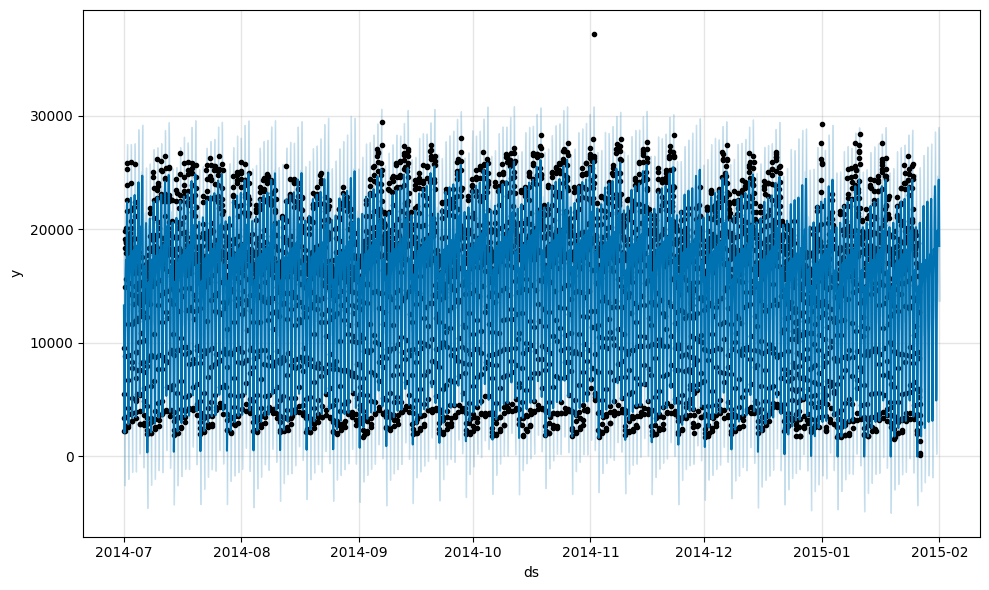

In [ ]:
fig1 = m.plot(forecast)


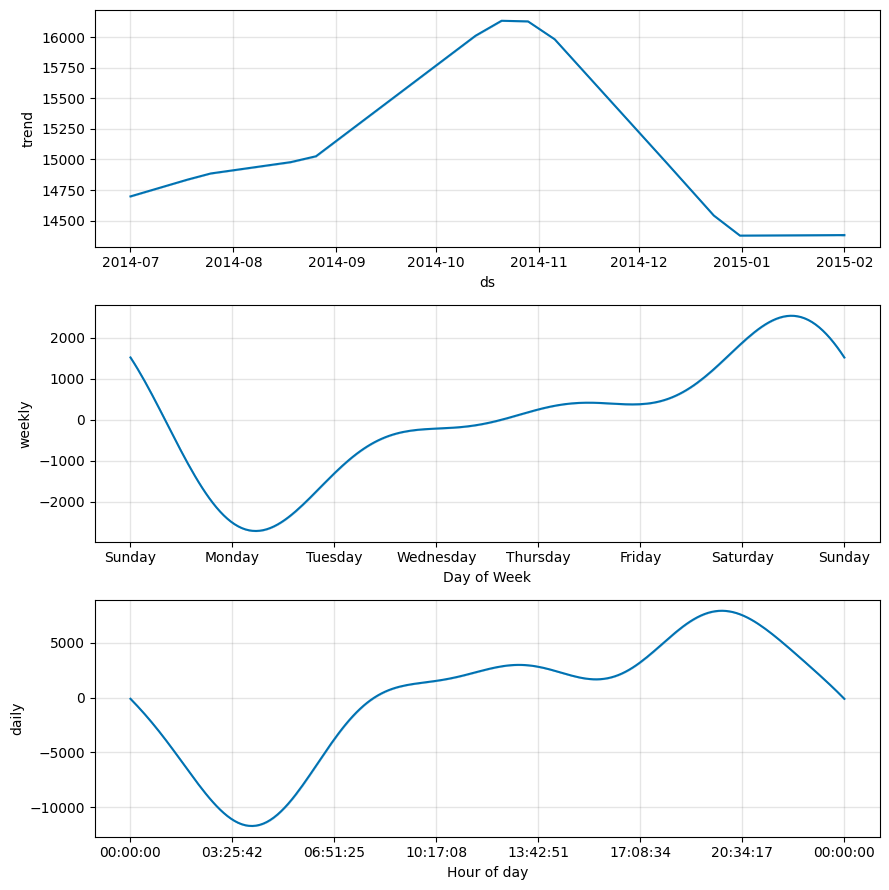

In [ ]:
comp = m.plot_components(forecast)


In [ ]:
results


,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13271.753504,8516.504977,18126.797039
2014-07-01 01:00:00,5433.0,10263.306021,5770.819816,14861.851429
2014-07-01 02:00:00,3346.5,6699.740199,2092.276118,11440.243978
2014-07-01 03:00:00,2216.5,3478.525588,-1089.537205,8118.474194
2014-07-01 04:00:00,2189.5,2047.705460,-2578.254210,7018.518000
...,...,...,...,...
2015-01-31 19:00:00,28288.5,23792.896081,19124.667438,28730.770479
2015-01-31 20:00:00,24138.0,24356.945956,19649.919426,29009.650402
2015-01-31 21:00:00,24194.5,23233.645964,18265.128594,27730.641748


In [ ]:
results['error'] = results['y'] - results['yhat']
print("************************")
print(results)

************************
                           y          yhat    yhat_lower    yhat_upper  \
ds                                                                       
2014-07-01 00:00:00   9485.5  13271.753504   8516.504977  18126.797039   
2014-07-01 01:00:00   5433.0  10263.306021   5770.819816  14861.851429   
2014-07-01 02:00:00   3346.5   6699.740199   2092.276118  11440.243978   
2014-07-01 03:00:00   2216.5   3478.525588  -1089.537205   8118.474194   
2014-07-01 04:00:00   2189.5   2047.705460  -2578.254210   7018.518000   
...                      ...           ...           ...           ...   
2015-01-31 19:00:00  28288.5  23792.896081  19124.667438  28730.770479   
2015-01-31 20:00:00  24138.0  24356.945956  19649.919426  29009.650402   
2015-01-31 21:00:00  24194.5  23233.645964  18265.128594  27730.641748   
2015-01-31 22:00:00  26515.0  21041.671137  16323.210296  25619.140388   
2015-01-31 23:00:00  26439.5  18514.484936  13669.460940  23384.434894   

            

In [ ]:
results['uncertainity'] = results['yhat_upper'] - results['yhat_lower']


In [ ]:
results


,y,yhat,yhat_lower,yhat_upper,error,uncertainity
ds,,,,,,
2014-07-01 00:00:00,9485.5,13271.753504,8516.504977,18126.797039,-3786.253504,9610.292062
2014-07-01 01:00:00,5433.0,10263.306021,5770.819816,14861.851429,-4830.306021,9091.031614
2014-07-01 02:00:00,3346.5,6699.740199,2092.276118,11440.243978,-3353.240199,9347.967861
2014-07-01 03:00:00,2216.5,3478.525588,-1089.537205,8118.474194,-1262.025588,9208.011399
2014-07-01 04:00:00,2189.5,2047.705460,-2578.254210,7018.518000,141.794540,9596.772209
...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23792.896081,19124.667438,28730.770479,4495.603919,9606.103041
2015-01-31 20:00:00,24138.0,24356.945956,19649.919426,29009.650402,-218.945956,9359.730976
2015-01-31 21:00:00,24194.5,23233.645964,18265.128594,27730.641748,960.854036,9465.513154


In [ ]:
results[results['error'].abs() > 1.5*results['uncertainity']]


,y,yhat,yhat_lower,yhat_upper,error,uncertainity
ds,,,,,,
2014-11-02 01:00:00,37204.5,14182.964370,9330.157090,18658.547022,23021.535630,9328.389933
2015-01-01 01:00:00,29292.0,11429.707219,6660.661454,16612.886114,17862.292781,9952.224660
2015-01-01 02:00:00,25753.5,7794.214536,3231.266125,12662.970166,17959.285464,9431.704041
2015-01-01 03:00:00,22067.0,4503.062160,148.182009,8961.184505,17563.937840,8813.002496
2015-01-26 19:00:00,4565.5,19787.219895,15323.362523,24579.471915,-15221.719895,9256.109393
2015-01-26 20:00:00,3630.5,20562.473508,16179.427246,25451.583374,-16931.973508,9272.156128
2015-01-26 21:00:00,2907.0,19663.573155,14627.993212,24479.995531,-16756.573155,9852.002319
2015-01-26 22:00:00,1324.5,17707.784199,13183.600009,22088.681848,-16383.284199,8905.081840
2015-01-26 23:00:00,243.0,15427.099654,10753.501900,20418.194428,-15184.099654,9664.692529


In [ ]:
results['anomaly'] = results.apply(lambda x: 'Yes' if (np.abs(x['error']) > 1.5*x['uncertainity']) else 'No', axis=1)


In [ ]:
results


,y,yhat,yhat_lower,yhat_upper,error,uncertainity,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13271.753504,8516.504977,18126.797039,-3786.253504,9610.292062,No
2014-07-01 01:00:00,5433.0,10263.306021,5770.819816,14861.851429,-4830.306021,9091.031614,No
2014-07-01 02:00:00,3346.5,6699.740199,2092.276118,11440.243978,-3353.240199,9347.967861,No
2014-07-01 03:00:00,2216.5,3478.525588,-1089.537205,8118.474194,-1262.025588,9208.011399,No
2014-07-01 04:00:00,2189.5,2047.705460,-2578.254210,7018.518000,141.794540,9596.772209,No
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23792.896081,19124.667438,28730.770479,4495.603919,9606.103041,No
2015-01-31 20:00:00,24138.0,24356.945956,19649.919426,29009.650402,-218.945956,9359.730976,No
2015-01-31 21:00:00,24194.5,23233.645964,18265.128594,27730.641748,960.854036,9465.513154,No


In [ ]:
fig = px.scatter(results.reset_index(), x = 'ds',y = 'y',color='anomaly',title = 'NYC_Taxi_Demand')

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='month',stepmode = "backward"),
                        dict(count = 2,label = '3y',step='month',stepmode = "backward"),
                        dict(count = 3,label = '5y',step='month',stepmode = "todate"),
                        dict(step= 'all')
                            ])
                        )
                   )
fig.show()